# Understanding Document Clustering

Clustering is one of the most important Unsupervised Machine Learning Techniques. These algorithms come in handy, especially in situations where labelled data is a luxury. Clustering techniques help us understand the underlying patterns in data (more so around them being similar) along with the ability to bootstrap certain supervised learning approaches as well.

![](https://github.com/duybluemind1988/Data-science/blob/master/NLP/Text_analytic_Apress/Ch07%20-%20Text%20Similarity%20and%20Clustering/avengers.jpg?raw=1)

Clustering techniques have been studied in depth over the years and there are some very powerful clustering algorithms available. For this tutorial, we will be working with a movie dataset containing movie plot, cast, genres and related other information. We will be working with __K-Means__ and __Ward-Hierarchical-Clustering__ methods.

# Load Dataset

In [2]:
import pandas as pd

df = pd.read_csv('https://github.com/duybluemind1988/Data-science/blob/master/NLP/Text_analytic_Apress/Ch07%20-%20Text%20Similarity%20and%20Clustering/tmdb_5000_movies.csv.gz?raw=true', 
                 compression='gzip')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [3]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
df = df[['title', 'tagline', 'overview', 'genres', 'popularity']]
df.tagline.fillna('', inplace=True)
df['description'] = df['tagline'].map(str) + ' ' + df['overview']
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4800 entries, 0 to 4802
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        4800 non-null   object 
 1   tagline      4800 non-null   object 
 2   overview     4800 non-null   object 
 3   genres       4800 non-null   object 
 4   popularity   4800 non-null   float64
 5   description  4800 non-null   object 
dtypes: float64(1), object(5)
memory usage: 262.5+ KB


In [5]:
df.head()

,title,tagline,overview,genres,popularity,description
0,Avatar,Enter the World of Pandora.,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",150.437577,Enter the World of Pandora. In the 22nd centur...
1,Pirates of the Caribbean: At World's End,"At the end of the world, the adventure begins.","Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",139.082615,"At the end of the world, the adventure begins...."
2,Spectre,A Plan No One Escapes,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",107.376788,A Plan No One Escapes A cryptic message from B...
3,The Dark Knight Rises,The Legend Ends,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",112.312950,The Legend Ends Following the death of Distric...
4,John Carter,"Lost in our world, found in another.","John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",43.926995,"Lost in our world, found in another. John Cart..."


## Your Turn: Cluster Similar Movies

Here you will learn how to cluster text documents (in this case movies). We will use the following pipeline:
- Text pre-processing
- Feature Engineering
- Clustering Using K-Means
- Finding Optimal Value for K
- Prepare Movie Clusters

Clustering is an unsupervised approach to find groups of similar items in any given dataset. There are different clustering algorithms and __K-Means__ is a pretty simple yet affect one. Most movies span different emotions and can be categorized into multiple genres (same is the case with movies listed in our current dataset). Can clustering of movie descriptions help us understand these groupings?

Similarity analysis (in the previous section) was a good starting point, but can we do better? 

## Text pre-processing

We will do some basic text pre-processing on our movie descriptions before we build our features

In [6]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import re
import numpy as np

stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

norm_corpus = normalize_corpus(list(df['description']))
len(norm_corpus)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


4800

## Extract TF-IDF Features

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

stop_words = stop_words + ['one', 'two', 'get']
cv = CountVectorizer(ngram_range=(1, 2), min_df=10, max_df=0.8, stop_words=stop_words)
cv_matrix = cv.fit_transform(norm_corpus)
cv_matrix.shape

(4800, 3012)

## Cluster Movies using K-Means

In [8]:
from sklearn.cluster import KMeans

NUM_CLUSTERS = 6
km = KMeans(n_clusters=NUM_CLUSTERS, max_iter=10000, n_init=50, random_state=42).fit(cv_matrix)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10000,
       n_clusters=6, n_init=50, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [9]:
from collections import Counter

Counter(km.labels_)

Counter({0: 387, 1: 662, 2: 509, 3: 1, 4: 512, 5: 2729})

In [10]:
df['kmeans_cluster'] = km.labels_

In [24]:
df.head()

,title,tagline,overview,genres,popularity,description,kmeans_cluster
0,Avatar,Enter the World of Pandora.,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",150.437577,Enter the World of Pandora. In the 22nd centur...,2
1,Pirates of the Caribbean: At World's End,"At the end of the world, the adventure begins.","Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",139.082615,"At the end of the world, the adventure begins....",2
2,Spectre,A Plan No One Escapes,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",107.376788,A Plan No One Escapes A cryptic message from B...,5
3,The Dark Knight Rises,The Legend Ends,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",112.312950,The Legend Ends Following the death of Distric...,4
4,John Carter,"Lost in our world, found in another.","John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",43.926995,"Lost in our world, found in another. John Cart...",2


In [28]:
(df[['title', 'kmeans_cluster', 'popularity']]
                  .sort_values(by=['kmeans_cluster', 'popularity'], 
                               ascending=False)
                  #.groupby('kmeans_cluster').head(20)
                  )

,title,kmeans_cluster,popularity
95,Interstellar,5,724.247784
94,Guardians of the Galaxy,5,481.098624
199,Pirates of the Caribbean: The Curse of the Bla...,5,271.972889
82,Dawn of the Planet of the Apes,5,243.791743
200,The Hunger Games: Mockingjay - Part 1,5,206.227151
...,...,...,...
3670,Running Forever,0,0.028756
4181,Ed and His Dead Mother,0,0.023436
4797,Cavite,0,0.022173
4051,8 Days,0,0.015295


In [29]:
(df[['title', 'kmeans_cluster', 'popularity']]
                  .sort_values(by=['kmeans_cluster', 'popularity'], 
                               ascending=False)
                  .groupby('kmeans_cluster').head(20)
                  )
# Lay 20 phim cua tung cluster theo popularity

,title,kmeans_cluster,popularity
95,Interstellar,5,724.247784
94,Guardians of the Galaxy,5,481.098624
199,Pirates of the Caribbean: The Curse of the Bla...,5,271.972889
82,Dawn of the Planet of the Apes,5,243.791743
200,The Hunger Games: Mockingjay - Part 1,5,206.227151
...,...,...,...
589,Dracula Untold,0,64.457947
234,The Croods,0,64.183321
1847,GoodFellas,0,63.654244
107,Warcraft,0,63.148529


In [11]:
movie_clusters = (df[['title', 'kmeans_cluster', 'popularity']]
                  .sort_values(by=['kmeans_cluster', 'popularity'], 
                               ascending=False)
                  .groupby('kmeans_cluster').head(20))
movie_clusters = movie_clusters.copy(deep=True)

In [12]:
movie_clusters

,title,kmeans_cluster,popularity
95,Interstellar,5,724.247784
94,Guardians of the Galaxy,5,481.098624
199,Pirates of the Caribbean: The Curse of the Bla...,5,271.972889
82,Dawn of the Planet of the Apes,5,243.791743
200,The Hunger Games: Mockingjay - Part 1,5,206.227151
...,...,...,...
589,Dracula Untold,0,64.457947
234,The Croods,0,64.183321
1847,GoodFellas,0,63.654244
107,Warcraft,0,63.148529


In [30]:
movie_clusters.kmeans_cluster.value_counts()

5    20
4    20
2    20
1    20
0    20
3     1
Name: kmeans_cluster, dtype: int64

In [13]:
feature_names = cv.get_feature_names()
feature_names[:5]

['007', '10', '10 years', '100', '10yearold']

In [14]:
len(feature_names)

3012

In [15]:
print(km.cluster_centers_.shape)
km.cluster_centers_
# return vi tri tung cluster theo 3012 features (tu vung)

(6, 3012)


array([[0.        , 0.00516796, 0.00258398, ..., 0.00258398, 0.        ,
        0.00516796],
       [0.00302115, 0.00453172, 0.00302115, ..., 0.        , 0.00151057,
        0.00906344],
       [0.00196464, 0.        , 0.        , ..., 0.01375246, 0.01571709,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.0078125 , 0.00390625, ..., 0.        , 0.00585938,
        0.00390625],
       [0.00476365, 0.00659582, 0.00293148, ..., 0.00476365, 0.00293148,
        0.00073287]])

In [18]:
km.cluster_centers_.argsort()

array([[   0, 1343, 1351, ..., 1278, 1544,  960],
       [1042,  413, 1483, ..., 1626, 1592, 1544],
       [3011, 1871, 1867, ..., 2529, 2885, 2968],
       [   0, 1997, 1998, ..., 2858,  646, 2032],
       [   0, 1748,  376, ..., 1819, 2990, 1814],
       [ 960, 2770, 1886, ..., 1626, 2529, 2993]])

In [16]:
print(km.cluster_centers_.argsort()[:, ::-1].shape)
km.cluster_centers_.argsort()[:, ::-1]

(6, 3012)


array([[ 960, 1544, 1278, ..., 1351, 1343,    0],
       [1544, 1592, 1626, ..., 1483,  413, 1042],
       [2968, 2885, 2529, ..., 1867, 1871, 3011],
       [2032,  646, 2858, ..., 1998, 1997,    0],
       [1814, 2990, 1819, ...,  376, 1748,    0],
       [2993, 2529, 1626, ..., 1886, 2770,  960]])

In [17]:
ordered_centroids = km.cluster_centers_.argsort()[:, ::-1]
print(ordered_centroids.shape)
ordered_centroids
#Lets find out which top word (in 3012 words) belong to which cluster

(6, 3012)


array([[ 960, 1544, 1278, ..., 1351, 1343,    0],
       [1544, 1592, 1626, ..., 1483,  413, 1042],
       [2968, 2885, 2529, ..., 1867, 1871, 3011],
       [2032,  646, 2858, ..., 1998, 1997,    0],
       [1814, 2990, 1819, ...,  376, 1748,    0],
       [2993, 2529, 1626, ..., 1886, 2770,  960]])

In [22]:
topn_features = 15
# get key features for each cluster
# get movies belonging to each cluster
for cluster_num in range(NUM_CLUSTERS):
    key_features = [feature_names[index] 
                        for index in ordered_centroids[cluster_num, :topn_features]]
    movies = movie_clusters[movie_clusters['kmeans_cluster'] == cluster_num]['title'].values.tolist()
    print('CLUSTER #'+str(cluster_num+1))
    print('Key Features:', key_features)
    print('Popular Movies:', movies)
    print('-'*80)

CLUSTER #1
Key Features: ['family', 'life', 'home', 'young', 'father', 'new', 'man', 'lives', 'back', 'story', 'finds', 'son', 'friends', 'find', 'help']
Popular Movies: ['Frozen', 'The Godfather', 'The Godfather: Part II', 'Furious 7', "We're the Millers", 'The Twilight Saga: Breaking Dawn - Part 2', 'Gladiator', 'Birdman', 'Prisoners', 'American Sniper', 'The Hunger Games: Catching Fire', 'Run All Night', 'The Grand Budapest Hotel', 'Aliens', 'Southpaw', 'Dracula Untold', 'The Croods', 'GoodFellas', 'Warcraft', 'Hotel Transylvania 2']
--------------------------------------------------------------------------------
CLUSTER #2
Key Features: ['life', 'love', 'man', 'story', 'young', 'new', 'back', 'time', 'years', 'find', 'woman', 'hes', 'finds', 'way', 'death']
Popular Movies: ['Deadpool', 'Mad Max: Fury Road', 'Inception', 'Forrest Gump', 'The Shawshank Redemption', 'Harry Potter and the Chamber of Secrets', 'Inside Out', 'Twilight', 'Maleficent', "Harry Potter and the Philosopher's S

In [31]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim_features = cosine_similarity(cv_matrix)

In [32]:
cosine_sim_features.shape

(4800, 4800)

In [33]:
cosine_sim_features

array([[1.        , 0.05976143, 0.        , ..., 0.04652421, 0.        ,
        0.        ],
       [0.05976143, 1.        , 0.0438529 , ..., 0.07784989, 0.03676073,
        0.        ],
       [0.        , 0.0438529 , 1.        , ..., 0.03413944, 0.        ,
        0.        ],
       ...,
       [0.04652421, 0.07784989, 0.03413944, ..., 1.        , 0.02861819,
        0.        ],
       [0.        , 0.03676073, 0.        , ..., 0.02861819, 1.        ,
        0.05479966],
       [0.        , 0.        , 0.        , ..., 0.        , 0.05479966,
        1.        ]])

In [ ]:

km = KMeans(n_clusters=NUM_CLUSTERS, max_iter=10000, n_init=50, random_state=42).fit(cosine_sim_features)
Counter(km.labels_)

Counter({0: 723, 1: 424, 2: 357, 3: 883, 4: 503, 5: 1910})

In [34]:
df['kmeans_cluster'] = km.labels_

movie_clusters = (df[['title', 'kmeans_cluster', 'popularity']]
                  .sort_values(by=['kmeans_cluster', 'popularity'], 
                               ascending=False)
                  .groupby('kmeans_cluster').head(20))
movie_clusters = movie_clusters.copy(deep=True)
movie_clusters

,title,kmeans_cluster,popularity
95,Interstellar,5,724.247784
94,Guardians of the Galaxy,5,481.098624
199,Pirates of the Caribbean: The Curse of the Bla...,5,271.972889
82,Dawn of the Planet of the Apes,5,243.791743
200,The Hunger Games: Mockingjay - Part 1,5,206.227151
...,...,...,...
589,Dracula Untold,0,64.457947
234,The Croods,0,64.183321
1847,GoodFellas,0,63.654244
107,Warcraft,0,63.148529


In [35]:


# get movies belonging to each cluster
for cluster_num in range(NUM_CLUSTERS):
    movies = movie_clusters[movie_clusters['kmeans_cluster'] == cluster_num]['title'].values.tolist()
    print('CLUSTER #'+str(cluster_num+1))
    print('Popular Movies:', movies)
    print('-'*80)

CLUSTER #1
Popular Movies: ['Frozen', 'The Godfather', 'The Godfather: Part II', 'Furious 7', "We're the Millers", 'The Twilight Saga: Breaking Dawn - Part 2', 'Gladiator', 'Birdman', 'Prisoners', 'American Sniper', 'The Hunger Games: Catching Fire', 'Run All Night', 'The Grand Budapest Hotel', 'Aliens', 'Southpaw', 'Dracula Untold', 'The Croods', 'GoodFellas', 'Warcraft', 'Hotel Transylvania 2']
--------------------------------------------------------------------------------
CLUSTER #2
Popular Movies: ['Deadpool', 'Mad Max: Fury Road', 'Inception', 'Forrest Gump', 'The Shawshank Redemption', 'Harry Potter and the Chamber of Secrets', 'Inside Out', 'Twilight', 'Maleficent', "Harry Potter and the Philosopher's Stone", 'Bruce Almighty', 'The Hobbit: An Unexpected Journey', 'The Twilight Saga: Eclipse', 'Titanic', 'Fifty Shades of Grey', 'Blade Runner', 'Psycho', 'Up', 'The Lion King', 'Taken 3']
--------------------------------------------------------------------------------
CLUSTER #3
P

# Affinity Propagation

In [36]:
from sklearn.cluster import AffinityPropagation

ap = AffinityPropagation(max_iter=1000)
ap.fit(cosine_sim_features)
res = Counter(ap.labels_)
res.most_common(10)

[(183, 1355),
 (182, 93),
 (159, 80),
 (54, 74),
 (81, 57),
 (16, 51),
 (26, 47),
 (24, 45),
 (48, 43),
 (89, 42)]

In [37]:
df['affprop_cluster'] = ap.labels_
df['affprop_cluster'].value_counts()

183    1355
182      93
159      80
54       74
81       57
       ... 
19        5
202       5
207       5
203       4
53        4
Name: affprop_cluster, Length: 208, dtype: int64

In [ ]:

filtered_clusters = [item[0] for item in res.most_common(8)]
filtered_df = df[df['affprop_cluster'].isin(filtered_clusters)]
movie_clusters = (filtered_df[['title', 'affprop_cluster', 'popularity']]
                  .sort_values(by=['affprop_cluster', 'popularity'], 
                               ascending=False)
                  .groupby('affprop_cluster').head(20))
movie_clusters = movie_clusters.copy(deep=True)

# get key features for each cluster
# get movies belonging to each cluster
for cluster_num in range(len(filtered_clusters)):
    movies = movie_clusters[movie_clusters['affprop_cluster'] == filtered_clusters[cluster_num]]['title'].values.tolist()
    print('CLUSTER #'+str(filtered_clusters[cluster_num]))
    print('Popular Movies:', movies)
    print('-'*80)

CLUSTER #183
Popular Movies: ['Interstellar', 'Dawn of the Planet of the Apes', 'Big Hero 6', 'The Dark Knight', "Pirates of the Caribbean: Dead Man's Chest", 'The Hunger Games: Mockingjay - Part 2', 'Star Wars', 'Brave', 'The Lord of the Rings: The Return of the King', 'The Hobbit: The Battle of the Five Armies', 'Iron Man', 'Transformers: Age of Extinction', 'Lucy', 'Mission: Impossible - Rogue Nation', 'Maze Runner: The Scorch Trials', 'Spectre', 'The Green Mile', 'Terminator 2: Judgment Day', 'Exodus: Gods and Kings', 'Harry Potter and the Goblet of Fire']
--------------------------------------------------------------------------------
CLUSTER #182
Popular Movies: ['Inception', 'Harry Potter and the Chamber of Secrets', 'The Hobbit: An Unexpected Journey', 'Django Unchained', 'American Beauty', 'Snowpiercer', 'Trainspotting', 'First Blood', 'The Bourne Supremacy', 'Yes Man', 'The Secret Life of Walter Mitty', 'RED', 'Casino', 'The Passion of the Christ', 'Annie', 'Fantasia', 'Vicky

## Hierarchical Clustering
So far, we were successfull in clustering movies using __K-Means__. But is there any further level of understanding we can extract from this dataset in an unsupervised manner?

Hierarchical Clustering to the rescue. K-Means helped us understand similarities amongst movies, with hierarchical clustering we can aim at understanding abstract or higher level concepts which are common across groups of movies. There are primarily two ways in which hierarchical clustering can be performed:

- Divisive : The algorithm begins with every element in one big generic cluster and then goes on dividing them into specific clusters in a recursive manner.
- Agglomerative : In this case, the algorithm starts by placing every element into a cluster of its own and then goes on merging them into more general clusters in a recursive manner (till they all merge into one big cluster).

For this tutorial, we will work with __Ward clustering algorithm__. Ward clustering is an agglomerative clustering method, i.e. at each stage, the pair of clusters with minimum _between-cluster distance_ (or wcss) are merged. 

To work with Ward Clustering Algorithm, we perform the following steps:
-  Prepare a cosine distance matrix
-  Calclate a linkage_matrix
-  Plot the hierarchical structure as a dendrogram.  

In [38]:
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.metrics.pairwise import cosine_similarity

### Calculate Linkage Matrix using Cosine Similarity

In [39]:
def ward_hierarchical_clustering(feature_matrix):
    
    cosine_distance = 1 - cosine_similarity(feature_matrix)
    linkage_matrix = ward(cosine_distance)
    return linkage_matrix

### Plot Hierarchical Structure as a Dendrogram

In [40]:
def plot_hierarchical_clusters(linkage_matrix, movie_data, p=100, figure_size=(8,12)):
    # set size
    fig, ax = plt.subplots(figsize=figure_size) 
    movie_titles = movie_data['title'].values.tolist()
    # plot dendrogram
    R = dendrogram(linkage_matrix, orientation="left", labels=movie_titles,
                    truncate_mode='lastp', 
                    p=p,  
                    no_plot=True)
    temp = {R["leaves"][ii]: movie_titles[ii] for ii in range(len(R["leaves"]))}
    def llf(xx):
        return "{}".format(temp[xx])
    ax = dendrogram(
            linkage_matrix,
            truncate_mode='lastp',
            orientation="left",
            p=p,  
            leaf_label_func=llf, 
            leaf_font_size=10.,
            )
    plt.tick_params(axis= 'x',   
                    which='both',  
                    bottom='off',
                    top='off',
                    labelbottom='off')
    plt.tight_layout()
    plt.savefig('movie_hierachical_clusters.png', dpi=200)

In [41]:
linkage_matrix = ward_hierarchical_clustering(cv_matrix)

In [43]:
import matplotlib.pyplot as plt


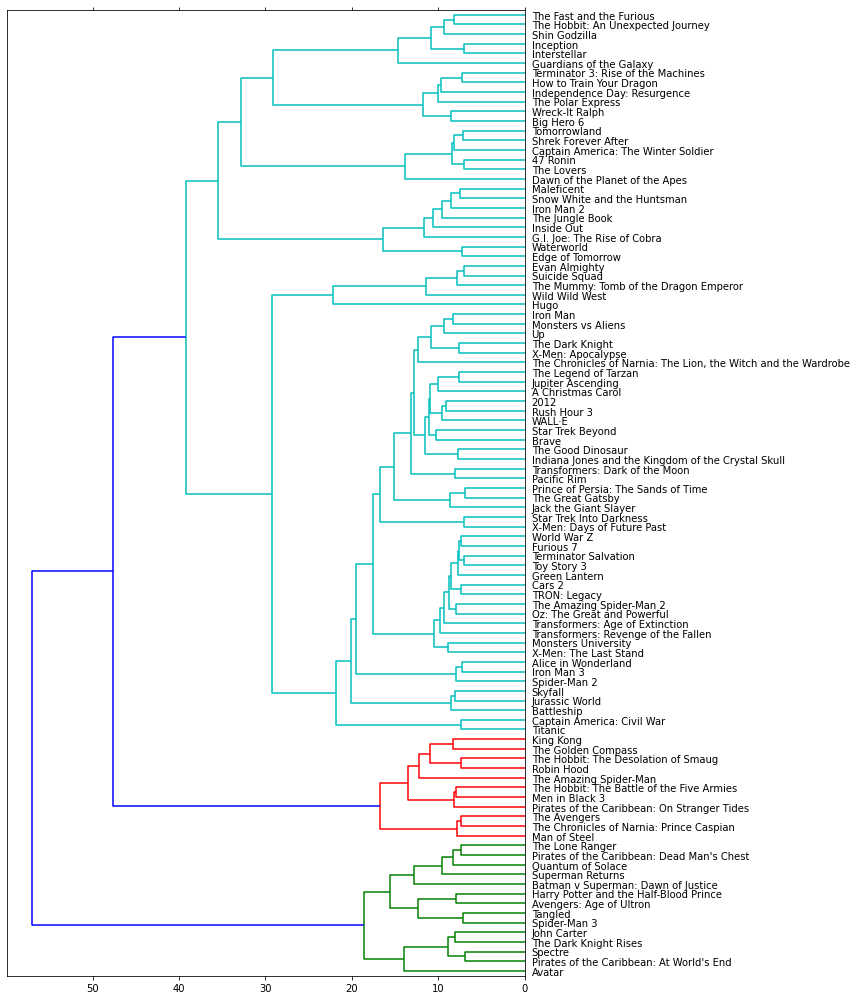

In [44]:
plot_hierarchical_clusters(linkage_matrix,
                           p=100,
                           movie_data=df,
                           figure_size=(12, 14))